In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mcd = pd.read_csv("/content/drive/MyDrive/CNN Practice Datasets/McD_dataset.csv")
mcd.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male


In [ ]:
mcd.shape

(1453, 15)

In [ ]:
mcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [ ]:
mcd.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [ ]:
mcd[mcd.duplicated()].shape

(22, 15)

In [ ]:
print("yummy:",np.unique(mcd['yummy']))
print("convenient:",np.unique(mcd['convenient']))
print("spicy:",np.unique(mcd['spicy']))
print("fattening:",np.unique(mcd['fattening']))
print("greasy:",np.unique(mcd['greasy']))
print("fast:",np.unique(mcd['fast']))
print("cheap:",np.unique(mcd['cheap']))
print("tasty:",np.unique(mcd['tasty']))
print("expensive:",np.unique(mcd['expensive']))
print("healthy:",np.unique(mcd['healthy']))
print("disgusting:",np.unique(mcd['disgusting']))
print("Like:",np.unique(mcd['Like']))
print("VisitFrequency:",np.unique(mcd['VisitFrequency']))
print("Gender:",np.unique(mcd['Gender']))

yummy: ['No' 'Yes']
convenient: ['No' 'Yes']
spicy: ['No' 'Yes']
fattening: ['No' 'Yes']
greasy: ['No' 'Yes']
fast: ['No' 'Yes']
cheap: ['No' 'Yes']
tasty: ['No' 'Yes']
expensive: ['No' 'Yes']
healthy: ['No' 'Yes']
disgusting: ['No' 'Yes']
Like: ['-1' '-2' '-3' '-4' '0' '1' '2' '3' '4' 'I hate it!-5' 'I love it!+5']
VisitFrequency: ['Every three months' 'More than once a week' 'Never' 'Once a month'
 'Once a week' 'Once a year']
Gender: ['Female' 'Male']


In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [ ]:
yum_val = pd.DataFrame(np.unique(mcd['yummy']),columns=['yummy_types'])
yum_val['yum_values'] = enc.fit_transform(yum_val['yummy_types'])
yum_val

,yummy_types,yum_values
0,No,0
1,Yes,1


In [ ]:
mcd['yummy'] = enc.fit_transform(mcd['yummy'])
mcd['convenient'] = enc.fit_transform(mcd['convenient'])
mcd['spicy'] = enc.fit_transform(mcd['spicy'])
mcd['fattening'] = enc.fit_transform(mcd['fattening'])
mcd['greasy'] = enc.fit_transform(mcd['greasy'])
mcd['fast'] = enc.fit_transform(mcd['fast'])
mcd['cheap'] = enc.fit_transform(mcd['cheap'])
mcd['tasty'] = enc.fit_transform(mcd['tasty'])
mcd['expensive'] = enc.fit_transform(mcd['expensive'])
mcd['healthy'] = enc.fit_transform(mcd['healthy'])
mcd['disgusting'] = enc.fit_transform(mcd['disgusting'])
mcd['Gender'] = enc.fit_transform(mcd['Gender'])

In [ ]:
gen_val = pd.DataFrame(np.unique(mcd['Gender']),columns=['gen_types'])
gen_val['gen_values'] = enc.fit_transform(gen_val['gen_types'])
gen_val

,gen_types,gen_values
0,0,0
1,1,1


In [ ]:
freq_set = set(mcd['VisitFrequency'])
mcd['VisitFrequency'] = mcd['VisitFrequency'].map({'Once a week':0,'More than once a week':1,'Once a month':2,\
                                                   'Every three months':3,'Once a year':4,'Never':5})

In [ ]:
like_set = set(mcd['Like'])
mcd['Like'] = mcd['Like'].map({'I hate it!-5':-5,'I love it!+5':5,'-4':-4,'-3':-3,'-2':-2,'-1':-1,'0':0,'1':1,\
                               '2':2,'3':3,'4':4})
#mcd['Like'] = mcd['Like'].astype(int)

In [ ]:
np.unique(mcd['Like'])

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5])

In [ ]:
mcd.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,3,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,3,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,3,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,0,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,2,1


In [ ]:
mcd.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946,0.777013,44.604955,2.492085,0.457674
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,3.116842,14.221178,1.477834,0.498377
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,18.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,33.000000,2.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,45.000000,2.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000,57.000000,4.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,71.000000,5.000000,1.000000


In [ ]:
(mcd['yummy']==1).mean()

0.5526496902959395

In [ ]:
from collections import Counter

In [ ]:
Counter(mcd['yummy'])

Counter({0: 650, 1: 803})

In [ ]:
df = pd.DataFrame(data=[['Yummy',mcd['yummy'].mean()]],columns=['attribute','mean'])
df

,attribute,mean
0,Yummy,0.55265


In [ ]:
mcd.mean(axis=0).round(2)[0:11]

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

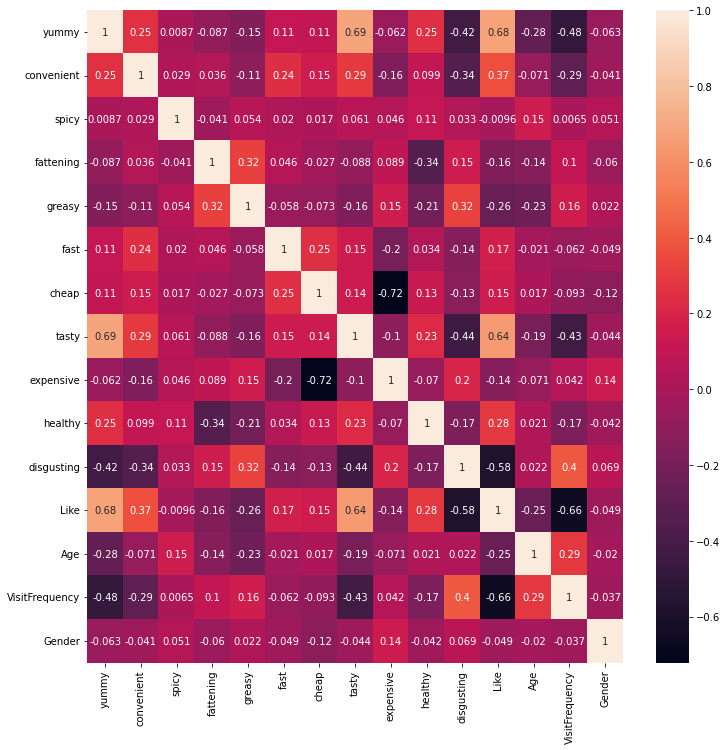

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(mcd.corr(), annot=True)
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [ ]:
X = mcd.values
X = scale(X)

In [ ]:
pca = PCA(n_components=15)
pca.fit(X)

PCA(n_components=15)

In [ ]:
exp_var = pca.explained_variance_ratio_
print(exp_var)
cum_var = np.cumsum(np.round(exp_var,decimals=4)*100)
print(cum_var)

[0.25717262 0.12356139 0.10608626 0.07341056 0.06936726 0.06534695
 0.05539173 0.04864683 0.04200494 0.03828973 0.03521511 0.03308618
 0.02013777 0.01710775 0.01517493]
[ 25.72  38.08  48.69  56.03  62.97  69.5   75.04  79.9   84.1   87.93
  91.45  94.76  96.77  98.48 100.  ]
